# Polynomial Regression: Predicting the Sine Function

We'll see how adding polynomial features helps predict non-linear patterns.

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [2]:
# Step 1: Create sine wave data
np.random.seed(42)

# Generate x values from 0 to 2pi
x = np.linspace(0, 10 * np.pi, 100)

# Create y values using sine function with small noise
y = np.sin(x) + np.random.normal(0, 0.1, 100)

print(f"Created {len(x)} data points")

Created 100 data points


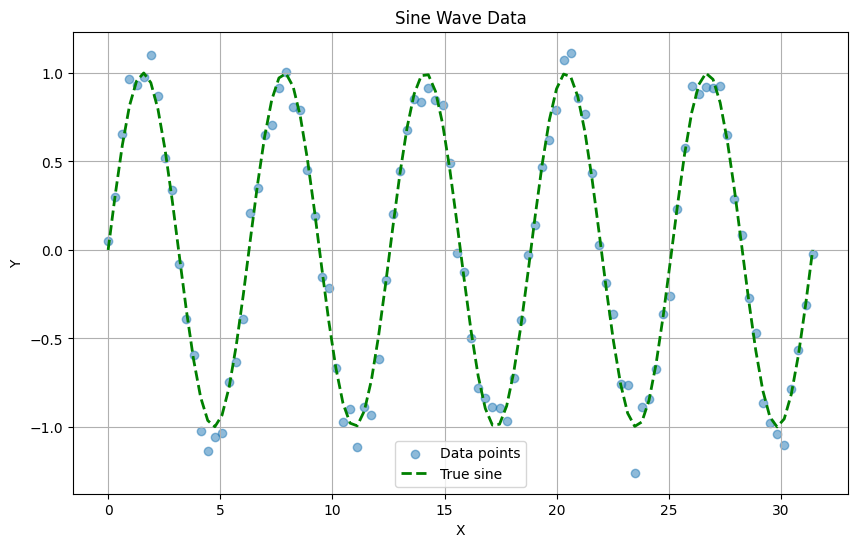

In [3]:
# Step 2: Visualize the sine data
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5, label='Data points')
plt.plot(x, np.sin(x), 'g--', label='True sine', linewidth=2)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Sine Wave Data')
plt.legend()
plt.grid(True)
plt.show()

In [4]:
# Step 3: Try with only X (degree 1)
x_reshaped = x.reshape(-1, 1)

model_1 = LinearRegression()
model_1.fit(x_reshaped, y)
y_pred_1 = model_1.predict(x_reshaped)

score_1 = model_1.score(x_reshaped, y)
print(f"Degree 1 (linear) - R² score: {score_1:.3f}")

Degree 1 (linear) - R² score: 0.021


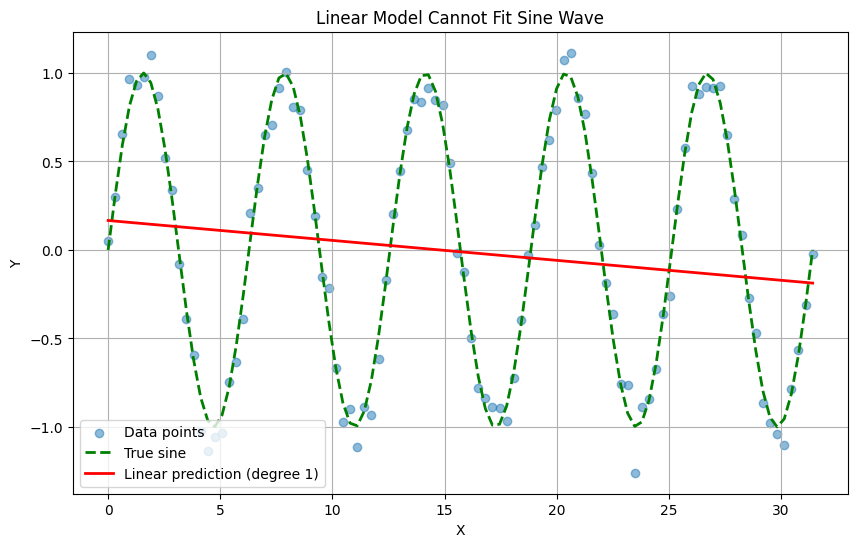

In [5]:
# Visualize linear prediction
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5, label='Data points')
plt.plot(x, np.sin(x), 'g--', label='True sine', linewidth=2)
plt.plot(x, y_pred_1, 'r-', label='Linear prediction (degree 1)', linewidth=2)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Model Cannot Fit Sine Wave')
plt.legend()
plt.grid(True)
plt.show()

## Taylor Series of Sine Function

The sine function can be approximated using its Taylor series expansion around $x = 0$:

$$\sin(x) = \sum_{n=0}^{\infty} \frac{(-1)^n x^{2n+1}}{(2n+1)!} = x - \frac{x^3}{3!} + \frac{x^5}{5!} - \frac{x^7}{7!} + \frac{x^9}{9!} - ...$$

Key observations:
- Only **odd powers** of $x$ appear $(x^1, x^3, x^5, x^7, ...)$
- Higher degree polynomials → better approximation
- This explains why polynomial regression can fit sine waves
- Degree 5-9 polynomials often work well for $x \in [0, 2\pi]$

In [6]:
# Step 4: Try with X and X² (degree 2)
poly_2 = PolynomialFeatures(degree=2)
x_poly_2 = poly_2.fit_transform(x_reshaped)

model_2 = LinearRegression()
model_2.fit(x_poly_2, y)
y_pred_2 = model_2.predict(x_poly_2)

score_2 = model_2.score(x_poly_2, y)
print(f"Degree 2 (quadratic) - R² score: {score_2:.3f}")

Degree 2 (quadratic) - R² score: 0.021


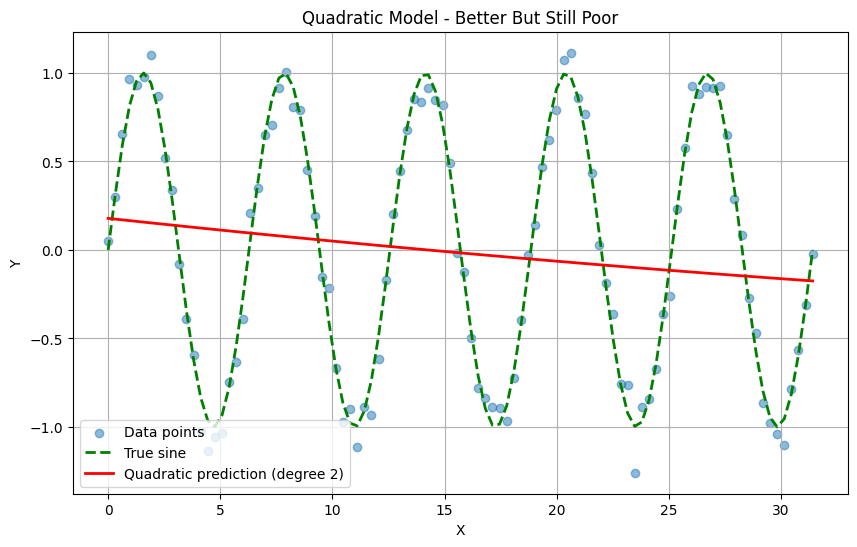

In [7]:
# Visualize quadratic prediction
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5, label='Data points')
plt.plot(x, np.sin(x), 'g--', label='True sine', linewidth=2)
plt.plot(x, y_pred_2, 'r-', label='Quadratic prediction (degree 2)', linewidth=2)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Quadratic Model - Better But Still Poor')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
# Step 5: Create a function to train with any polynomial degree
def train_polynomial_model(x, y, degree):
    """
    Train a polynomial regression model.
    
    Parameters:
    - x: input data
    - y: output data
    - degree: polynomial degree (creates features x^0, x^1, ..., x^N)
    
    Returns:
    - predictions, score
    """
    x_reshaped = x.reshape(-1, 1)
    
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    x_poly = poly.fit_transform(x_reshaped)
    
    # Train model
    model = LinearRegression()
    model.fit(x_poly, y)
    
    # Predict and score
    y_pred = model.predict(x_poly)
    score = model.score(x_poly, y)
    
    return y_pred, score

In [9]:
# Step 6: Test different polynomial degrees
degrees = [1, 3, 5, 7, 9, 15, 30, 50, 100]
# x x² x³
for degree in degrees:
    y_pred, score = train_polynomial_model(x, y, degree)
    print(f"Degree {degree:2d} - R² score: {score:.4f}")

Degree  1 - R² score: 0.0205
Degree  3 - R² score: 0.0736
Degree  5 - R² score: 0.0926
Degree  7 - R² score: 0.1105
Degree  9 - R² score: 0.1951
Degree 15 - R² score: 0.1428
Degree 30 - R² score: 0.1752
Degree 50 - R² score: 0.1639
Degree 100 - R² score: 0.0980


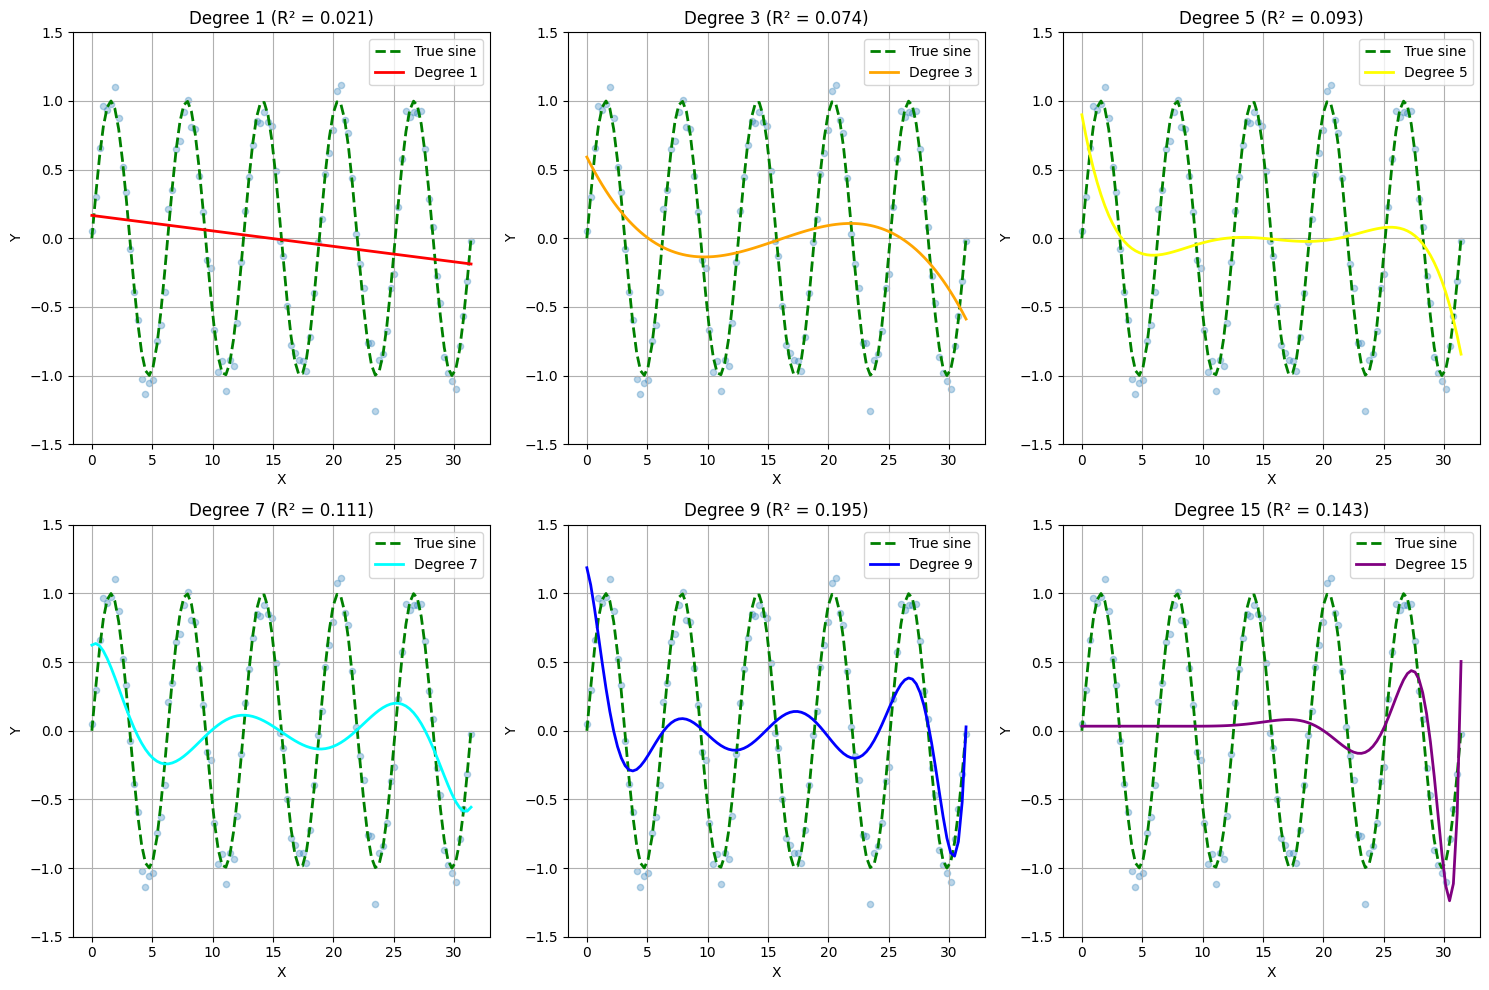

In [10]:
# Step 7: Visualize all models together
plt.figure(figsize=(15, 10))

degrees = [1, 3, 5, 7, 9, 15]
colors = ['red', 'orange', 'yellow', 'cyan', 'blue', 'purple']

for i, (degree, color) in enumerate(zip(degrees, colors), 1):
    plt.subplot(2, 3, i)
    
    y_pred, score = train_polynomial_model(x, y, degree)
    
    plt.scatter(x, y, alpha=0.3, s=20)
    plt.plot(x, np.sin(x), 'g--', label='True sine', linewidth=2)
    plt.plot(x, y_pred, color=color, label=f'Degree {degree}', linewidth=2)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(f'Degree {degree} (R² = {score:.3f})')
    plt.legend()
    plt.grid(True)
    plt.ylim(-1.5, 1.5)

plt.tight_layout()
plt.show()

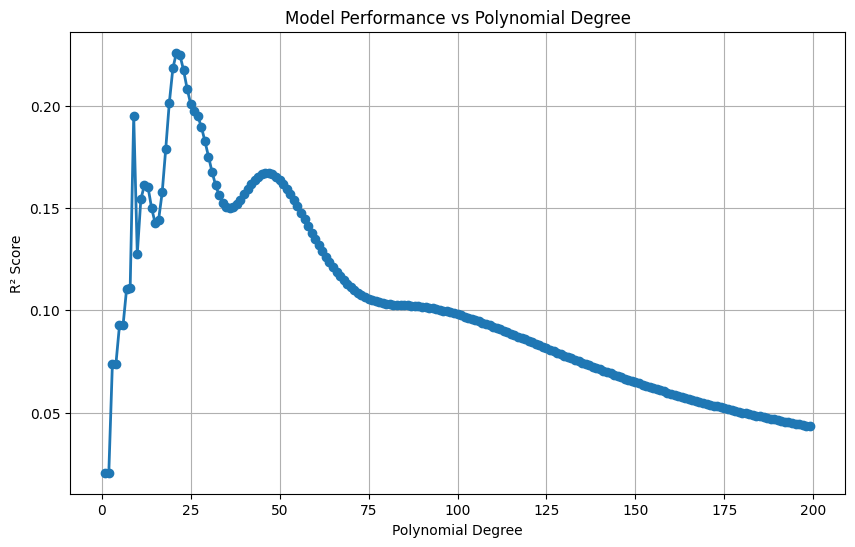


Best degree: 21 with R² = 0.2260


In [11]:
# Compare scores across many degrees
degrees_range = range(1, 200)
scores = []

for degree in degrees_range:
    _, score = train_polynomial_model(x, y, degree)
    scores.append(score)

plt.figure(figsize=(10, 6))
plt.plot(degrees_range, scores, marker='o', linewidth=2)
plt.xlabel('Polynomial Degree')
plt.ylabel('R² Score')
plt.title('Model Performance vs Polynomial Degree')
plt.grid(True)
plt.show()

best_degree = list(degrees_range)[np.argmax(scores)]
print(f"\nBest degree: {best_degree} with R² = {max(scores):.4f}")